In [2]:
from bitarray import bitarray
import mmh3
import random
import numpy as np
import math

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K

/Users/aditijain/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/aditijain/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/aditijain/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/aditijain/opt/anaconda3/lib/python3.7/site-packages

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def fpr(y_true,y_pred):
    y_pred_pos = K.round(K.clip(y_pred, 0, 1))
    y_pred_neg = 1 - y_pred_pos

    y_pos = K.round(K.clip(y_true, 0, 1))
    y_neg = 1 - y_pos

    tp = K.sum(y_pos * y_pred_pos)
    tn = K.sum(y_neg * y_pred_neg)

    fp = K.sum(y_neg * y_pred_pos)
    fn = K.sum(y_pos * y_pred_neg)

    fpr=fp/(fp+tn)
    return(fpr)

In [6]:
additional_metrics = ['accuracy']
loss_function = BinaryCrossentropy()
number_of_epochs = 500
optimizer = Adam()
verbosity_mode = 0
layer_size = 10

In [7]:
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Data generation

In [10]:
m=75000
n=25000
#m=40
#n=30
r=0.5

In [11]:
x_pos = np.random.normal(loc=250, scale=100, size=(m//2))
x_neg = np.random.normal(loc=750, scale=100, size=(m//2))

x_train = np.concatenate((x_pos, x_neg)).reshape(-1, 1).astype(int)
y_t=y_train = np.concatenate((np.ones(m//2), np.zeros(m//2))).reshape(-1, 1).astype(int)

In [12]:
x_train.shape

(75000, 1)

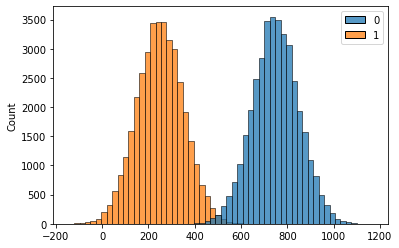

In [13]:
sns.histplot(x=x_train.flatten(), hue=y_train.flatten())

## Model training

In [14]:
batch_size = len(x_train)

In [15]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

In [16]:
model.metrics_names


['loss', 'acc']

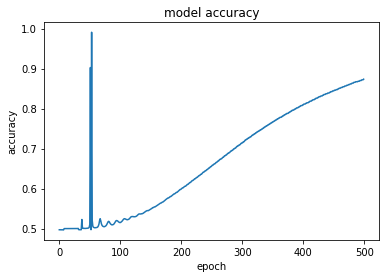

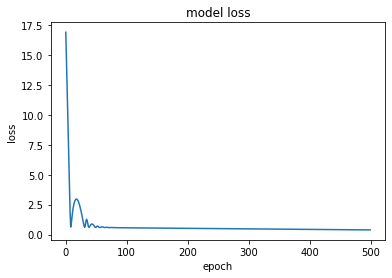

In [17]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=10

In [18]:
number_of_epochs = 150
layer_size = 50

In [19]:
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

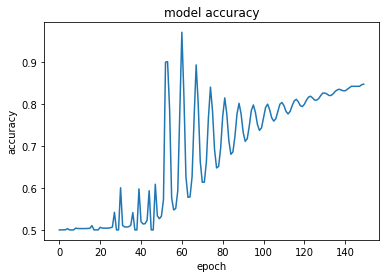

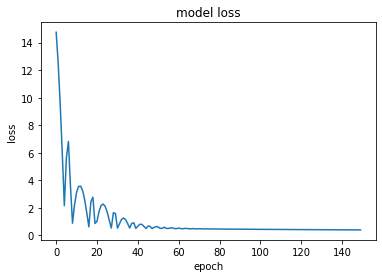

In [23]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=50

In [24]:
layer_size = 200
number_of_epochs = 100
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               400       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 201       
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


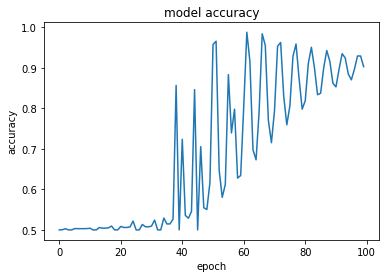

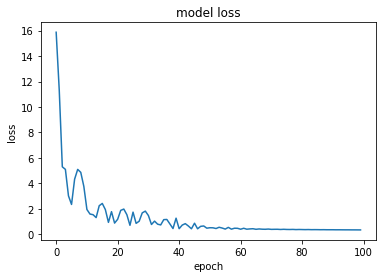

In [25]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=200

In [26]:
number_of_epochs = 60
layer_size = 1000
model = Sequential()
model.add(Dense(layer_size,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
model.summary()
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=number_of_epochs, verbose=verbosity_mode)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1000)              2000      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 1001      
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________


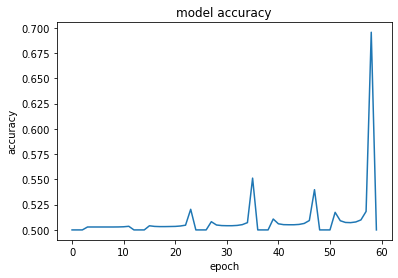

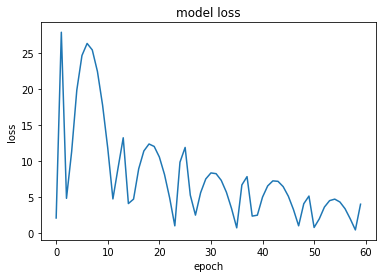

In [27]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#Hidden Layer Size=1000

In [28]:
class BloomFilter:
    
    def __init__(self, size, hash_count):
        self.size = size
        self.hash_count = hash_count
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)
        
    def add(self, num):
        for seed in range(1,self.hash_count+1):
            result = mmh3.hash(str(num), seed) % self.size
            self.bit_array[result] = 1
            
    def lookup(self, num):
        for seed in range(1,self.hash_count+1):
            result = mmh3.hash(str(num), seed) % self.size
            if self.bit_array[result] == 0:
                return False
        return True

#adds ratio r of an array of random integers of size n to bloom filter bf(input : bf,size,ratio; output: data array)
def addrandom(bf,n,r):
    data=np.empty(n,dtype=int)
    for i in range(0,n):
        data[i]=random.randint(0, 100000000)
    for j in range(0,int(n*r)):
        bf.add(data[j]);
    return data

#(Input:bloom filter,number array,ratio of positives; Output:(-1) for false negative, otherwise fpr)
def fpr(bf,nums,r):
    for i in range(int(len(nums)*r)):
        if(bf.lookup(nums[i])==False):
            print(nums[i])
            return -1
    count = 0
    for i in range(int(len(nums)*r),len(nums)):
        if(bf.lookup(nums[i])==True):
            count+=1
    return count/(len(nums)-int(len(nums)*r))

#(Input:bloom filter size, total random numbers, ratio of number inserted; Output:efficient number of hash functions)
def eff_k(m,n,r):
    k=int(m/(int(n*r))*math.log(2))
    if(k==0):
        return 1
    return k

#(Input:size of bloom filter, number of hash functions, total numbers, ratio of numbers inserted; Output: fpr)
def find_fpr(m,k,n,r):
    bf=BloomFilter(m,k)
    data=addrandom(bf,n,r)
    return fpr(bf,data,r)

#(Input:size of bloom filter, total numbers, ratio of numbers inserted; Output: prints inputs and fpr)
def outputs(m,n,r):
    k=eff_k(m,n,r)
    find_fpr(m,k,n,r)
    #print("For m=%d, k=%d, n=%d, r=%.3f: fpr=%.3f"%(m,k,n,r,find_fpr(m,k,n,r)))

In [44]:
def load_bloom(model,data_x,data_y,bf,n):
    y_pred = model.predict(data_x)
    for i in range(0,n):
        if((y_pred[i]<=0.99)and(data_y[i]==1)):
            print(f'{data_x[i]}{i} inserted to bf')
            bf.add(data_x[i])
        else:
            continue

In [45]:
#m=75000
#n=25000
#r=0.5
k=eff_k(m,n,r)
bf=BloomFilter(m,k)

In [46]:
load_bloom(model,x_train,y_train,bf,n)

[188]0 inserted to bf
[92]2 inserted to bf
[257]3 inserted to bf
[174]4 inserted to bf
[154]5 inserted to bf
[282]6 inserted to bf
[158]7 inserted to bf
[235]8 inserted to bf
[100]9 inserted to bf
[177]10 inserted to bf
[55]11 inserted to bf
[194]12 inserted to bf
[46]13 inserted to bf
[71]14 inserted to bf
[197]15 inserted to bf
[154]16 inserted to bf
[204]17 inserted to bf
[144]18 inserted to bf
[139]19 inserted to bf
[235]22 inserted to bf
[222]24 inserted to bf
[264]26 inserted to bf
[255]27 inserted to bf
[135]28 inserted to bf
[131]30 inserted to bf
[195]31 inserted to bf
[95]32 inserted to bf
[237]33 inserted to bf
[234]35 inserted to bf
[257]36 inserted to bf
[272]37 inserted to bf
[176]39 inserted to bf
[168]40 inserted to bf
[52]41 inserted to bf
[288]42 inserted to bf
[269]43 inserted to bf
[302]44 inserted to bf
[129]46 inserted to bf
[294]47 inserted to bf
[239]49 inserted to bf
[258]52 inserted to bf
[71]54 inserted to bf
[283]57 inserted to bf
[236]58 inserted to bf
[241

[122]702 inserted to bf
[205]703 inserted to bf
[181]704 inserted to bf
[148]705 inserted to bf
[310]706 inserted to bf
[255]707 inserted to bf
[19]708 inserted to bf
[269]710 inserted to bf
[205]711 inserted to bf
[333]712 inserted to bf
[282]713 inserted to bf
[168]714 inserted to bf
[208]715 inserted to bf
[161]717 inserted to bf
[223]718 inserted to bf
[135]719 inserted to bf
[300]720 inserted to bf
[256]722 inserted to bf
[225]723 inserted to bf
[144]724 inserted to bf
[151]725 inserted to bf
[277]727 inserted to bf
[283]728 inserted to bf
[236]729 inserted to bf
[233]730 inserted to bf
[298]732 inserted to bf
[106]733 inserted to bf
[307]734 inserted to bf
[280]735 inserted to bf
[136]738 inserted to bf
[208]739 inserted to bf
[289]740 inserted to bf
[298]741 inserted to bf
[230]743 inserted to bf
[214]744 inserted to bf
[327]745 inserted to bf
[244]746 inserted to bf
[293]747 inserted to bf
[276]749 inserted to bf
[321]750 inserted to bf
[170]751 inserted to bf
[293]752 inserted

[209]1150 inserted to bf
[204]1152 inserted to bf
[271]1153 inserted to bf
[246]1154 inserted to bf
[95]1155 inserted to bf
[291]1156 inserted to bf
[202]1157 inserted to bf
[200]1158 inserted to bf
[329]1159 inserted to bf
[228]1161 inserted to bf
[139]1162 inserted to bf
[283]1163 inserted to bf
[239]1164 inserted to bf
[164]1165 inserted to bf
[230]1166 inserted to bf
[202]1167 inserted to bf
[307]1168 inserted to bf
[269]1169 inserted to bf
[266]1170 inserted to bf
[306]1171 inserted to bf
[264]1172 inserted to bf
[234]1173 inserted to bf
[189]1175 inserted to bf
[247]1176 inserted to bf
[169]1178 inserted to bf
[225]1179 inserted to bf
[184]1181 inserted to bf
[220]1182 inserted to bf
[315]1183 inserted to bf
[273]1185 inserted to bf
[159]1186 inserted to bf
[202]1187 inserted to bf
[208]1188 inserted to bf
[172]1190 inserted to bf
[311]1192 inserted to bf
[173]1193 inserted to bf
[190]1194 inserted to bf
[239]1195 inserted to bf
[124]1196 inserted to bf
[272]1197 inserted to bf
[

[107]1667 inserted to bf
[204]1669 inserted to bf
[200]1670 inserted to bf
[288]1672 inserted to bf
[163]1674 inserted to bf
[144]1675 inserted to bf
[322]1676 inserted to bf
[19]1677 inserted to bf
[201]1678 inserted to bf
[236]1680 inserted to bf
[312]1681 inserted to bf
[334]1683 inserted to bf
[325]1684 inserted to bf
[82]1685 inserted to bf
[327]1686 inserted to bf
[190]1687 inserted to bf
[243]1688 inserted to bf
[265]1690 inserted to bf
[319]1694 inserted to bf
[142]1695 inserted to bf
[124]1696 inserted to bf
[295]1697 inserted to bf
[290]1698 inserted to bf
[71]1700 inserted to bf
[196]1701 inserted to bf
[268]1702 inserted to bf
[311]1703 inserted to bf
[275]1704 inserted to bf
[269]1705 inserted to bf
[187]1706 inserted to bf
[300]1708 inserted to bf
[206]1709 inserted to bf
[163]1710 inserted to bf
[290]1711 inserted to bf
[278]1712 inserted to bf
[178]1715 inserted to bf
[158]1716 inserted to bf
[87]1717 inserted to bf
[276]1718 inserted to bf
[277]1720 inserted to bf
[298

[202]2173 inserted to bf
[229]2174 inserted to bf
[182]2175 inserted to bf
[261]2177 inserted to bf
[315]2181 inserted to bf
[229]2183 inserted to bf
[313]2186 inserted to bf
[249]2188 inserted to bf
[217]2189 inserted to bf
[180]2190 inserted to bf
[246]2191 inserted to bf
[192]2192 inserted to bf
[266]2193 inserted to bf
[215]2194 inserted to bf
[140]2195 inserted to bf
[272]2196 inserted to bf
[318]2197 inserted to bf
[311]2198 inserted to bf
[223]2199 inserted to bf
[272]2201 inserted to bf
[253]2204 inserted to bf
[127]2205 inserted to bf
[301]2208 inserted to bf
[323]2209 inserted to bf
[274]2210 inserted to bf
[322]2214 inserted to bf
[227]2215 inserted to bf
[323]2216 inserted to bf
[315]2217 inserted to bf
[324]2218 inserted to bf
[334]2219 inserted to bf
[249]2223 inserted to bf
[326]2224 inserted to bf
[85]2225 inserted to bf
[153]2227 inserted to bf
[57]2228 inserted to bf
[320]2229 inserted to bf
[153]2231 inserted to bf
[257]2233 inserted to bf
[243]2234 inserted to bf
[3

[264]2711 inserted to bf
[182]2712 inserted to bf
[238]2714 inserted to bf
[194]2715 inserted to bf
[179]2716 inserted to bf
[144]2717 inserted to bf
[41]2718 inserted to bf
[241]2720 inserted to bf
[288]2721 inserted to bf
[82]2722 inserted to bf
[247]2724 inserted to bf
[181]2727 inserted to bf
[117]2728 inserted to bf
[212]2729 inserted to bf
[46]2731 inserted to bf
[203]2732 inserted to bf
[273]2733 inserted to bf
[320]2734 inserted to bf
[309]2736 inserted to bf
[70]2738 inserted to bf
[302]2739 inserted to bf
[223]2740 inserted to bf
[169]2741 inserted to bf
[191]2742 inserted to bf
[222]2743 inserted to bf
[218]2744 inserted to bf
[300]2745 inserted to bf
[328]2747 inserted to bf
[283]2749 inserted to bf
[209]2750 inserted to bf
[227]2751 inserted to bf
[204]2752 inserted to bf
[223]2753 inserted to bf
[297]2754 inserted to bf
[145]2755 inserted to bf
[248]2756 inserted to bf
[215]2757 inserted to bf
[261]2758 inserted to bf
[205]2759 inserted to bf
[85]2760 inserted to bf
[57]2

[235]3218 inserted to bf
[229]3219 inserted to bf
[121]3220 inserted to bf
[324]3221 inserted to bf
[260]3222 inserted to bf
[300]3223 inserted to bf
[294]3224 inserted to bf
[195]3225 inserted to bf
[128]3226 inserted to bf
[216]3228 inserted to bf
[262]3231 inserted to bf
[281]3234 inserted to bf
[283]3235 inserted to bf
[14]3236 inserted to bf
[272]3237 inserted to bf
[214]3238 inserted to bf
[291]3239 inserted to bf
[327]3240 inserted to bf
[231]3241 inserted to bf
[204]3242 inserted to bf
[327]3243 inserted to bf
[290]3244 inserted to bf
[222]3245 inserted to bf
[63]3246 inserted to bf
[230]3248 inserted to bf
[191]3249 inserted to bf
[211]3251 inserted to bf
[205]3252 inserted to bf
[127]3253 inserted to bf
[319]3254 inserted to bf
[285]3257 inserted to bf
[245]3258 inserted to bf
[124]3260 inserted to bf
[5]3261 inserted to bf
[274]3263 inserted to bf
[285]3265 inserted to bf
[249]3266 inserted to bf
[155]3267 inserted to bf
[307]3268 inserted to bf
[306]3269 inserted to bf
[276

[216]3695 inserted to bf
[225]3697 inserted to bf
[195]3698 inserted to bf
[254]3699 inserted to bf
[118]3700 inserted to bf
[269]3701 inserted to bf
[117]3702 inserted to bf
[146]3703 inserted to bf
[202]3704 inserted to bf
[273]3705 inserted to bf
[146]3706 inserted to bf
[299]3708 inserted to bf
[320]3709 inserted to bf
[157]3710 inserted to bf
[180]3711 inserted to bf
[217]3712 inserted to bf
[266]3713 inserted to bf
[167]3714 inserted to bf
[211]3715 inserted to bf
[303]3716 inserted to bf
[46]3717 inserted to bf
[289]3718 inserted to bf
[215]3719 inserted to bf
[176]3721 inserted to bf
[80]3723 inserted to bf
[198]3724 inserted to bf
[124]3725 inserted to bf
[188]3726 inserted to bf
[203]3727 inserted to bf
[303]3728 inserted to bf
[244]3729 inserted to bf
[314]3730 inserted to bf
[248]3731 inserted to bf
[207]3733 inserted to bf
[277]3734 inserted to bf
[217]3735 inserted to bf
[294]3736 inserted to bf
[331]3737 inserted to bf
[281]3738 inserted to bf
[321]3739 inserted to bf
[2

[75]4270 inserted to bf
[246]4271 inserted to bf
[187]4272 inserted to bf
[310]4273 inserted to bf
[263]4274 inserted to bf
[253]4275 inserted to bf
[302]4277 inserted to bf
[258]4278 inserted to bf
[332]4279 inserted to bf
[272]4280 inserted to bf
[236]4281 inserted to bf
[255]4282 inserted to bf
[277]4283 inserted to bf
[73]4284 inserted to bf
[279]4285 inserted to bf
[265]4286 inserted to bf
[248]4287 inserted to bf
[239]4288 inserted to bf
[156]4289 inserted to bf
[326]4290 inserted to bf
[153]4291 inserted to bf
[216]4293 inserted to bf
[159]4294 inserted to bf
[73]4295 inserted to bf
[178]4296 inserted to bf
[279]4297 inserted to bf
[297]4300 inserted to bf
[109]4301 inserted to bf
[185]4303 inserted to bf
[323]4304 inserted to bf
[240]4305 inserted to bf
[229]4306 inserted to bf
[253]4307 inserted to bf
[174]4309 inserted to bf
[94]4310 inserted to bf
[245]4311 inserted to bf
[219]4312 inserted to bf
[202]4313 inserted to bf
[85]4314 inserted to bf
[185]4317 inserted to bf
[129]

[124]4734 inserted to bf
[291]4735 inserted to bf
[222]4737 inserted to bf
[136]4738 inserted to bf
[321]4739 inserted to bf
[143]4740 inserted to bf
[119]4741 inserted to bf
[154]4742 inserted to bf
[207]4744 inserted to bf
[219]4745 inserted to bf
[27]4746 inserted to bf
[236]4747 inserted to bf
[174]4748 inserted to bf
[305]4749 inserted to bf
[215]4750 inserted to bf
[72]4751 inserted to bf
[221]4752 inserted to bf
[263]4753 inserted to bf
[153]4755 inserted to bf
[266]4756 inserted to bf
[30]4757 inserted to bf
[35]4758 inserted to bf
[206]4759 inserted to bf
[253]4761 inserted to bf
[219]4762 inserted to bf
[199]4763 inserted to bf
[241]4764 inserted to bf
[264]4766 inserted to bf
[168]4767 inserted to bf
[228]4768 inserted to bf
[225]4769 inserted to bf
[311]4770 inserted to bf
[291]4771 inserted to bf
[323]4772 inserted to bf
[258]4773 inserted to bf
[128]4774 inserted to bf
[300]4775 inserted to bf
[10]4776 inserted to bf
[163]4777 inserted to bf
[135]4778 inserted to bf
[247]

[267]5345 inserted to bf
[189]5346 inserted to bf
[226]5347 inserted to bf
[194]5348 inserted to bf
[127]5349 inserted to bf
[275]5350 inserted to bf
[183]5351 inserted to bf
[333]5353 inserted to bf
[179]5354 inserted to bf
[301]5355 inserted to bf
[202]5357 inserted to bf
[264]5358 inserted to bf
[323]5359 inserted to bf
[102]5360 inserted to bf
[215]5361 inserted to bf
[162]5362 inserted to bf
[237]5363 inserted to bf
[233]5364 inserted to bf
[164]5365 inserted to bf
[114]5366 inserted to bf
[176]5368 inserted to bf
[174]5369 inserted to bf
[227]5370 inserted to bf
[320]5371 inserted to bf
[198]5372 inserted to bf
[310]5373 inserted to bf
[268]5374 inserted to bf
[183]5375 inserted to bf
[159]5376 inserted to bf
[291]5377 inserted to bf
[141]5378 inserted to bf
[146]5379 inserted to bf
[281]5380 inserted to bf
[87]5382 inserted to bf
[131]5383 inserted to bf
[328]5384 inserted to bf
[131]5385 inserted to bf
[217]5386 inserted to bf
[309]5387 inserted to bf
[132]5388 inserted to bf
[

[163]6095 inserted to bf
[285]6096 inserted to bf
[249]6097 inserted to bf
[205]6098 inserted to bf
[201]6099 inserted to bf
[268]6100 inserted to bf
[315]6102 inserted to bf
[293]6103 inserted to bf
[306]6105 inserted to bf
[222]6106 inserted to bf
[50]6109 inserted to bf
[310]6110 inserted to bf
[277]6111 inserted to bf
[261]6112 inserted to bf
[214]6114 inserted to bf
[221]6116 inserted to bf
[268]6117 inserted to bf
[261]6118 inserted to bf
[321]6119 inserted to bf
[284]6120 inserted to bf
[253]6121 inserted to bf
[285]6124 inserted to bf
[201]6125 inserted to bf
[269]6126 inserted to bf
[198]6127 inserted to bf
[15]6128 inserted to bf
[120]6129 inserted to bf
[191]6130 inserted to bf
[234]6131 inserted to bf
[5]6132 inserted to bf
[323]6133 inserted to bf
[210]6134 inserted to bf
[102]6135 inserted to bf
[322]6136 inserted to bf
[248]6137 inserted to bf
[329]6138 inserted to bf
[277]6139 inserted to bf
[85]6140 inserted to bf
[284]6141 inserted to bf
[116]6142 inserted to bf
[224]

[218]6495 inserted to bf
[227]6496 inserted to bf
[267]6497 inserted to bf
[201]6498 inserted to bf
[110]6499 inserted to bf
[144]6500 inserted to bf
[169]6502 inserted to bf
[115]6503 inserted to bf
[233]6504 inserted to bf
[154]6505 inserted to bf
[132]6506 inserted to bf
[279]6507 inserted to bf
[330]6508 inserted to bf
[167]6510 inserted to bf
[249]6511 inserted to bf
[206]6512 inserted to bf
[169]6514 inserted to bf
[106]6515 inserted to bf
[87]6516 inserted to bf
[321]6517 inserted to bf
[245]6518 inserted to bf
[262]6520 inserted to bf
[324]6521 inserted to bf
[269]6523 inserted to bf
[221]6524 inserted to bf
[91]6525 inserted to bf
[271]6526 inserted to bf
[175]6527 inserted to bf
[126]6528 inserted to bf
[45]6529 inserted to bf
[298]6530 inserted to bf
[133]6531 inserted to bf
[216]6532 inserted to bf
[69]6534 inserted to bf
[307]6536 inserted to bf
[194]6537 inserted to bf
[63]6538 inserted to bf
[324]6539 inserted to bf
[250]6540 inserted to bf
[239]6541 inserted to bf
[268]

[149]7225 inserted to bf
[123]7226 inserted to bf
[268]7227 inserted to bf
[194]7228 inserted to bf
[154]7229 inserted to bf
[265]7230 inserted to bf
[309]7231 inserted to bf
[230]7232 inserted to bf
[297]7233 inserted to bf
[128]7234 inserted to bf
[270]7235 inserted to bf
[159]7236 inserted to bf
[214]7237 inserted to bf
[121]7238 inserted to bf
[286]7240 inserted to bf
[251]7241 inserted to bf
[244]7242 inserted to bf
[226]7245 inserted to bf
[216]7246 inserted to bf
[241]7247 inserted to bf
[304]7248 inserted to bf
[240]7249 inserted to bf
[187]7250 inserted to bf
[262]7252 inserted to bf
[208]7253 inserted to bf
[197]7254 inserted to bf
[298]7255 inserted to bf
[231]7256 inserted to bf
[192]7257 inserted to bf
[99]7259 inserted to bf
[334]7260 inserted to bf
[44]7261 inserted to bf
[232]7262 inserted to bf
[161]7264 inserted to bf
[252]7265 inserted to bf
[73]7266 inserted to bf
[113]7267 inserted to bf
[305]7269 inserted to bf
[169]7270 inserted to bf
[124]7271 inserted to bf
[10

[209]7930 inserted to bf
[291]7931 inserted to bf
[296]7932 inserted to bf
[161]7933 inserted to bf
[165]7934 inserted to bf
[267]7935 inserted to bf
[106]7936 inserted to bf
[330]7937 inserted to bf
[286]7938 inserted to bf
[310]7940 inserted to bf
[174]7941 inserted to bf
[161]7943 inserted to bf
[43]7944 inserted to bf
[196]7945 inserted to bf
[308]7946 inserted to bf
[145]7948 inserted to bf
[210]7949 inserted to bf
[81]7950 inserted to bf
[184]7952 inserted to bf
[152]7953 inserted to bf
[48]7954 inserted to bf
[298]7955 inserted to bf
[146]7956 inserted to bf
[163]7957 inserted to bf
[150]7958 inserted to bf
[275]7959 inserted to bf
[223]7962 inserted to bf
[42]7963 inserted to bf
[172]7964 inserted to bf
[335]7965 inserted to bf
[267]7967 inserted to bf
[197]7968 inserted to bf
[172]7969 inserted to bf
[212]7970 inserted to bf
[261]7971 inserted to bf
[177]7972 inserted to bf
[306]7973 inserted to bf
[293]7974 inserted to bf
[175]7975 inserted to bf
[60]7976 inserted to bf
[28]7

[83]8365 inserted to bf
[163]8366 inserted to bf
[178]8367 inserted to bf
[225]8368 inserted to bf
[317]8369 inserted to bf
[190]8370 inserted to bf
[254]8371 inserted to bf
[280]8372 inserted to bf
[194]8373 inserted to bf
[313]8376 inserted to bf
[270]8377 inserted to bf
[176]8378 inserted to bf
[287]8379 inserted to bf
[256]8380 inserted to bf
[209]8381 inserted to bf
[128]8382 inserted to bf
[249]8384 inserted to bf
[146]8386 inserted to bf
[162]8387 inserted to bf
[267]8388 inserted to bf
[243]8390 inserted to bf
[166]8391 inserted to bf
[240]8393 inserted to bf
[76]8395 inserted to bf
[207]8396 inserted to bf
[153]8399 inserted to bf
[254]8400 inserted to bf
[125]8401 inserted to bf
[65]8402 inserted to bf
[286]8403 inserted to bf
[187]8404 inserted to bf
[115]8405 inserted to bf
[182]8406 inserted to bf
[249]8407 inserted to bf
[260]8409 inserted to bf
[130]8411 inserted to bf
[103]8412 inserted to bf
[312]8413 inserted to bf
[227]8415 inserted to bf
[222]8416 inserted to bf
[17

[333]9291 inserted to bf
[264]9292 inserted to bf
[279]9293 inserted to bf
[265]9294 inserted to bf
[175]9297 inserted to bf
[272]9298 inserted to bf
[300]9299 inserted to bf
[263]9300 inserted to bf
[250]9301 inserted to bf
[327]9302 inserted to bf
[284]9303 inserted to bf
[199]9306 inserted to bf
[267]9307 inserted to bf
[127]9310 inserted to bf
[211]9311 inserted to bf
[327]9312 inserted to bf
[58]9313 inserted to bf
[298]9314 inserted to bf
[311]9315 inserted to bf
[201]9316 inserted to bf
[180]9317 inserted to bf
[322]9319 inserted to bf
[220]9320 inserted to bf
[208]9322 inserted to bf
[317]9323 inserted to bf
[57]9324 inserted to bf
[260]9325 inserted to bf
[115]9327 inserted to bf
[300]9328 inserted to bf
[244]9329 inserted to bf
[291]9330 inserted to bf
[204]9331 inserted to bf
[243]9332 inserted to bf
[333]9333 inserted to bf
[229]9334 inserted to bf
[207]9335 inserted to bf
[187]9336 inserted to bf
[289]9337 inserted to bf
[205]9338 inserted to bf
[291]9339 inserted to bf
[1

[229]9721 inserted to bf
[271]9722 inserted to bf
[154]9723 inserted to bf
[199]9725 inserted to bf
[282]9728 inserted to bf
[113]9729 inserted to bf
[112]9731 inserted to bf
[275]9732 inserted to bf
[121]9733 inserted to bf
[325]9734 inserted to bf
[179]9736 inserted to bf
[198]9737 inserted to bf
[312]9738 inserted to bf
[159]9739 inserted to bf
[225]9740 inserted to bf
[223]9741 inserted to bf
[260]9743 inserted to bf
[133]9744 inserted to bf
[323]9745 inserted to bf
[244]9746 inserted to bf
[262]9748 inserted to bf
[209]9750 inserted to bf
[178]9751 inserted to bf
[239]9752 inserted to bf
[225]9753 inserted to bf
[158]9755 inserted to bf
[277]9758 inserted to bf
[191]9759 inserted to bf
[217]9760 inserted to bf
[230]9761 inserted to bf
[246]9762 inserted to bf
[272]9763 inserted to bf
[62]9764 inserted to bf
[200]9765 inserted to bf
[281]9767 inserted to bf
[249]9768 inserted to bf
[236]9769 inserted to bf
[154]9773 inserted to bf
[175]9774 inserted to bf
[97]9776 inserted to bf
[2

[251]10324 inserted to bf
[236]10325 inserted to bf
[320]10326 inserted to bf
[235]10327 inserted to bf
[330]10329 inserted to bf
[144]10330 inserted to bf
[228]10332 inserted to bf
[306]10333 inserted to bf
[161]10334 inserted to bf
[167]10335 inserted to bf
[230]10337 inserted to bf
[152]10338 inserted to bf
[163]10339 inserted to bf
[148]10342 inserted to bf
[193]10345 inserted to bf
[198]10347 inserted to bf
[221]10348 inserted to bf
[247]10349 inserted to bf
[323]10350 inserted to bf
[199]10351 inserted to bf
[204]10352 inserted to bf
[331]10353 inserted to bf
[295]10355 inserted to bf
[256]10356 inserted to bf
[226]10357 inserted to bf
[260]10358 inserted to bf
[326]10359 inserted to bf
[94]10360 inserted to bf
[299]10362 inserted to bf
[194]10363 inserted to bf
[260]10364 inserted to bf
[165]10365 inserted to bf
[303]10367 inserted to bf
[299]10368 inserted to bf
[324]10369 inserted to bf
[221]10370 inserted to bf
[257]10371 inserted to bf
[124]10372 inserted to bf
[234]10373 in

[246]11028 inserted to bf
[282]11029 inserted to bf
[322]11030 inserted to bf
[288]11031 inserted to bf
[215]11032 inserted to bf
[334]11033 inserted to bf
[185]11034 inserted to bf
[234]11035 inserted to bf
[138]11036 inserted to bf
[299]11037 inserted to bf
[171]11038 inserted to bf
[250]11039 inserted to bf
[251]11040 inserted to bf
[288]11041 inserted to bf
[84]11042 inserted to bf
[292]11043 inserted to bf
[231]11044 inserted to bf
[264]11047 inserted to bf
[263]11048 inserted to bf
[211]11049 inserted to bf
[158]11050 inserted to bf
[236]11051 inserted to bf
[192]11052 inserted to bf
[192]11053 inserted to bf
[301]11054 inserted to bf
[226]11055 inserted to bf
[132]11056 inserted to bf
[284]11057 inserted to bf
[206]11062 inserted to bf
[152]11064 inserted to bf
[255]11065 inserted to bf
[321]11068 inserted to bf
[223]11069 inserted to bf
[302]11071 inserted to bf
[224]11073 inserted to bf
[0]11075 inserted to bf
[223]11076 inserted to bf
[227]11077 inserted to bf
[253]11078 inse

[121]11536 inserted to bf
[328]11538 inserted to bf
[151]11539 inserted to bf
[302]11540 inserted to bf
[245]11541 inserted to bf
[319]11543 inserted to bf
[294]11544 inserted to bf
[323]11545 inserted to bf
[287]11546 inserted to bf
[256]11547 inserted to bf
[259]11548 inserted to bf
[253]11549 inserted to bf
[156]11550 inserted to bf
[94]11551 inserted to bf
[299]11552 inserted to bf
[240]11553 inserted to bf
[289]11554 inserted to bf
[99]11555 inserted to bf
[170]11556 inserted to bf
[233]11557 inserted to bf
[299]11558 inserted to bf
[313]11560 inserted to bf
[272]11561 inserted to bf
[284]11562 inserted to bf
[272]11563 inserted to bf
[292]11565 inserted to bf
[70]11566 inserted to bf
[145]11567 inserted to bf
[159]11569 inserted to bf
[186]11570 inserted to bf
[284]11571 inserted to bf
[223]11572 inserted to bf
[330]11573 inserted to bf
[277]11574 inserted to bf
[202]11576 inserted to bf
[283]11578 inserted to bf
[323]11579 inserted to bf
[232]11580 inserted to bf
[158]11581 inse

[213]12073 inserted to bf
[318]12074 inserted to bf
[308]12075 inserted to bf
[197]12077 inserted to bf
[324]12078 inserted to bf
[284]12079 inserted to bf
[272]12080 inserted to bf
[82]12081 inserted to bf
[198]12083 inserted to bf
[209]12084 inserted to bf
[25]12085 inserted to bf
[160]12086 inserted to bf
[302]12087 inserted to bf
[283]12088 inserted to bf
[248]12089 inserted to bf
[195]12090 inserted to bf
[265]12091 inserted to bf
[296]12092 inserted to bf
[62]12093 inserted to bf
[300]12095 inserted to bf
[272]12096 inserted to bf
[309]12097 inserted to bf
[242]12099 inserted to bf
[114]12101 inserted to bf
[218]12102 inserted to bf
[150]12103 inserted to bf
[185]12104 inserted to bf
[308]12105 inserted to bf
[259]12106 inserted to bf
[314]12107 inserted to bf
[53]12108 inserted to bf
[68]12109 inserted to bf
[291]12110 inserted to bf
[323]12111 inserted to bf
[229]12112 inserted to bf
[160]12113 inserted to bf
[273]12115 inserted to bf
[110]12116 inserted to bf
[156]12117 insert

[92]12652 inserted to bf
[73]12653 inserted to bf
[75]12654 inserted to bf
[258]12655 inserted to bf
[196]12657 inserted to bf
[319]12658 inserted to bf
[299]12659 inserted to bf
[298]12660 inserted to bf
[75]12661 inserted to bf
[181]12662 inserted to bf
[190]12663 inserted to bf
[206]12664 inserted to bf
[182]12665 inserted to bf
[281]12666 inserted to bf
[301]12667 inserted to bf
[201]12669 inserted to bf
[331]12670 inserted to bf
[305]12671 inserted to bf
[178]12672 inserted to bf
[327]12673 inserted to bf
[236]12674 inserted to bf
[287]12675 inserted to bf
[184]12676 inserted to bf
[210]12677 inserted to bf
[298]12679 inserted to bf
[293]12680 inserted to bf
[292]12681 inserted to bf
[318]12682 inserted to bf
[46]12683 inserted to bf
[135]12684 inserted to bf
[137]12685 inserted to bf
[134]12688 inserted to bf
[294]12689 inserted to bf
[168]12690 inserted to bf
[138]12691 inserted to bf
[198]12692 inserted to bf
[204]12694 inserted to bf
[222]12696 inserted to bf
[286]12697 insert

[185]13098 inserted to bf
[191]13099 inserted to bf
[161]13101 inserted to bf
[122]13102 inserted to bf
[163]13103 inserted to bf
[292]13104 inserted to bf
[260]13105 inserted to bf
[185]13106 inserted to bf
[246]13107 inserted to bf
[135]13108 inserted to bf
[176]13109 inserted to bf
[242]13110 inserted to bf
[275]13111 inserted to bf
[110]13112 inserted to bf
[160]13113 inserted to bf
[266]13114 inserted to bf
[304]13115 inserted to bf
[179]13116 inserted to bf
[210]13117 inserted to bf
[178]13119 inserted to bf
[244]13120 inserted to bf
[305]13123 inserted to bf
[302]13124 inserted to bf
[122]13125 inserted to bf
[250]13126 inserted to bf
[287]13127 inserted to bf
[209]13128 inserted to bf
[190]13129 inserted to bf
[169]13130 inserted to bf
[310]13131 inserted to bf
[329]13132 inserted to bf
[131]13133 inserted to bf
[293]13134 inserted to bf
[251]13135 inserted to bf
[309]13136 inserted to bf
[224]13137 inserted to bf
[231]13138 inserted to bf
[118]13139 inserted to bf
[119]13141 i

[258]13611 inserted to bf
[289]13612 inserted to bf
[127]13613 inserted to bf
[282]13614 inserted to bf
[153]13615 inserted to bf
[331]13616 inserted to bf
[255]13617 inserted to bf
[221]13619 inserted to bf
[183]13621 inserted to bf
[161]13622 inserted to bf
[320]13623 inserted to bf
[65]13624 inserted to bf
[248]13625 inserted to bf
[186]13626 inserted to bf
[265]13627 inserted to bf
[121]13628 inserted to bf
[171]13629 inserted to bf
[252]13630 inserted to bf
[136]13631 inserted to bf
[107]13632 inserted to bf
[241]13633 inserted to bf
[272]13634 inserted to bf
[2]13635 inserted to bf
[218]13636 inserted to bf
[282]13637 inserted to bf
[201]13638 inserted to bf
[255]13639 inserted to bf
[127]13640 inserted to bf
[268]13642 inserted to bf
[305]13643 inserted to bf
[255]13644 inserted to bf
[167]13645 inserted to bf
[221]13646 inserted to bf
[197]13647 inserted to bf
[288]13648 inserted to bf
[194]13650 inserted to bf
[125]13651 inserted to bf
[275]13652 inserted to bf
[328]13653 inse

[49]14500 inserted to bf
[81]14502 inserted to bf
[285]14503 inserted to bf
[237]14504 inserted to bf
[171]14505 inserted to bf
[300]14506 inserted to bf
[229]14507 inserted to bf
[252]14508 inserted to bf
[144]14509 inserted to bf
[244]14510 inserted to bf
[322]14511 inserted to bf
[105]14512 inserted to bf
[313]14513 inserted to bf
[94]14514 inserted to bf
[261]14515 inserted to bf
[213]14516 inserted to bf
[248]14517 inserted to bf
[234]14518 inserted to bf
[208]14519 inserted to bf
[151]14520 inserted to bf
[233]14523 inserted to bf
[325]14524 inserted to bf
[283]14525 inserted to bf
[318]14526 inserted to bf
[165]14527 inserted to bf
[245]14528 inserted to bf
[229]14529 inserted to bf
[227]14530 inserted to bf
[274]14531 inserted to bf
[209]14532 inserted to bf
[302]14533 inserted to bf
[232]14534 inserted to bf
[294]14536 inserted to bf
[304]14537 inserted to bf
[268]14538 inserted to bf
[219]14539 inserted to bf
[171]14540 inserted to bf
[155]14541 inserted to bf
[225]14542 inse

[161]15017 inserted to bf
[64]15018 inserted to bf
[215]15019 inserted to bf
[125]15020 inserted to bf
[93]15021 inserted to bf
[257]15022 inserted to bf
[21]15023 inserted to bf
[330]15024 inserted to bf
[284]15025 inserted to bf
[207]15026 inserted to bf
[199]15027 inserted to bf
[300]15028 inserted to bf
[280]15029 inserted to bf
[139]15030 inserted to bf
[264]15031 inserted to bf
[245]15035 inserted to bf
[217]15036 inserted to bf
[212]15037 inserted to bf
[206]15038 inserted to bf
[207]15039 inserted to bf
[222]15040 inserted to bf
[267]15041 inserted to bf
[187]15042 inserted to bf
[131]15043 inserted to bf
[173]15045 inserted to bf
[225]15048 inserted to bf
[291]15049 inserted to bf
[154]15050 inserted to bf
[165]15051 inserted to bf
[328]15053 inserted to bf
[330]15054 inserted to bf
[169]15055 inserted to bf
[219]15056 inserted to bf
[212]15057 inserted to bf
[134]15058 inserted to bf
[230]15059 inserted to bf
[194]15060 inserted to bf
[67]15061 inserted to bf
[228]15062 inser

[254]15454 inserted to bf
[280]15455 inserted to bf
[149]15456 inserted to bf
[136]15457 inserted to bf
[283]15458 inserted to bf
[168]15459 inserted to bf
[209]15460 inserted to bf
[213]15461 inserted to bf
[94]15462 inserted to bf
[172]15463 inserted to bf
[307]15464 inserted to bf
[166]15466 inserted to bf
[190]15467 inserted to bf
[227]15468 inserted to bf
[314]15469 inserted to bf
[321]15470 inserted to bf
[55]15472 inserted to bf
[230]15474 inserted to bf
[306]15475 inserted to bf
[215]15477 inserted to bf
[168]15478 inserted to bf
[237]15479 inserted to bf
[145]15482 inserted to bf
[306]15483 inserted to bf
[280]15484 inserted to bf
[286]15489 inserted to bf
[165]15490 inserted to bf
[203]15492 inserted to bf
[317]15493 inserted to bf
[223]15495 inserted to bf
[142]15496 inserted to bf
[214]15497 inserted to bf
[294]15499 inserted to bf
[305]15501 inserted to bf
[333]15505 inserted to bf
[294]15507 inserted to bf
[173]15508 inserted to bf
[280]15509 inserted to bf
[125]15510 ins

[289]15931 inserted to bf
[197]15932 inserted to bf
[181]15933 inserted to bf
[221]15934 inserted to bf
[190]15935 inserted to bf
[321]15936 inserted to bf
[202]15937 inserted to bf
[136]15940 inserted to bf
[224]15941 inserted to bf
[267]15943 inserted to bf
[266]15945 inserted to bf
[234]15946 inserted to bf
[104]15948 inserted to bf
[301]15949 inserted to bf
[237]15951 inserted to bf
[35]15953 inserted to bf
[335]15954 inserted to bf
[146]15955 inserted to bf
[276]15956 inserted to bf
[209]15957 inserted to bf
[267]15958 inserted to bf
[119]15959 inserted to bf
[294]15960 inserted to bf
[5]15966 inserted to bf
[332]15968 inserted to bf
[132]15969 inserted to bf
[284]15971 inserted to bf
[239]15973 inserted to bf
[126]15975 inserted to bf
[321]15976 inserted to bf
[273]15977 inserted to bf
[321]15978 inserted to bf
[311]15981 inserted to bf
[234]15982 inserted to bf
[135]15983 inserted to bf
[243]15985 inserted to bf
[210]15986 inserted to bf
[297]15987 inserted to bf
[221]15988 inse

[304]16482 inserted to bf
[118]16483 inserted to bf
[319]16484 inserted to bf
[242]16487 inserted to bf
[192]16488 inserted to bf
[190]16490 inserted to bf
[13]16492 inserted to bf
[211]16494 inserted to bf
[113]16495 inserted to bf
[213]16496 inserted to bf
[198]16498 inserted to bf
[219]16500 inserted to bf
[269]16501 inserted to bf
[283]16502 inserted to bf
[182]16503 inserted to bf
[89]16504 inserted to bf
[224]16505 inserted to bf
[249]16506 inserted to bf
[167]16508 inserted to bf
[30]16509 inserted to bf
[210]16510 inserted to bf
[218]16511 inserted to bf
[287]16512 inserted to bf
[293]16513 inserted to bf
[271]16514 inserted to bf
[151]16515 inserted to bf
[294]16516 inserted to bf
[126]16517 inserted to bf
[269]16519 inserted to bf
[263]16520 inserted to bf
[148]16521 inserted to bf
[199]16522 inserted to bf
[298]16523 inserted to bf
[334]16525 inserted to bf
[202]16527 inserted to bf
[74]16528 inserted to bf
[128]16529 inserted to bf
[176]16530 inserted to bf
[243]16531 inser

[135]16903 inserted to bf
[179]16904 inserted to bf
[173]16905 inserted to bf
[233]16906 inserted to bf
[92]16907 inserted to bf
[111]16908 inserted to bf
[223]16912 inserted to bf
[244]16913 inserted to bf
[298]16914 inserted to bf
[226]16915 inserted to bf
[159]16916 inserted to bf
[281]16917 inserted to bf
[309]16918 inserted to bf
[230]16920 inserted to bf
[192]16922 inserted to bf
[182]16923 inserted to bf
[296]16924 inserted to bf
[274]16926 inserted to bf
[298]16927 inserted to bf
[165]16929 inserted to bf
[245]16930 inserted to bf
[323]16931 inserted to bf
[107]16932 inserted to bf
[254]16933 inserted to bf
[291]16934 inserted to bf
[202]16936 inserted to bf
[321]16937 inserted to bf
[264]16939 inserted to bf
[140]16940 inserted to bf
[313]16941 inserted to bf
[214]16942 inserted to bf
[231]16944 inserted to bf
[206]16945 inserted to bf
[97]16946 inserted to bf
[142]16947 inserted to bf
[183]16949 inserted to bf
[9]16950 inserted to bf
[297]16951 inserted to bf
[287]16952 inser

[235]17810 inserted to bf
[224]17811 inserted to bf
[214]17812 inserted to bf
[263]17813 inserted to bf
[208]17814 inserted to bf
[268]17815 inserted to bf
[185]17816 inserted to bf
[150]17817 inserted to bf
[129]17818 inserted to bf
[173]17819 inserted to bf
[238]17821 inserted to bf
[77]17822 inserted to bf
[228]17823 inserted to bf
[274]17825 inserted to bf
[166]17827 inserted to bf
[307]17828 inserted to bf
[140]17829 inserted to bf
[121]17833 inserted to bf
[143]17834 inserted to bf
[137]17837 inserted to bf
[162]17838 inserted to bf
[152]17840 inserted to bf
[291]17841 inserted to bf
[202]17842 inserted to bf
[194]17843 inserted to bf
[237]17844 inserted to bf
[86]17845 inserted to bf
[126]17846 inserted to bf
[272]17847 inserted to bf
[229]17848 inserted to bf
[259]17849 inserted to bf
[205]17850 inserted to bf
[266]17851 inserted to bf
[133]17852 inserted to bf
[220]17853 inserted to bf
[214]17854 inserted to bf
[159]17855 inserted to bf
[334]17858 inserted to bf
[208]17859 ins

[199]18460 inserted to bf
[139]18463 inserted to bf
[236]18464 inserted to bf
[131]18466 inserted to bf
[319]18467 inserted to bf
[288]18468 inserted to bf
[285]18469 inserted to bf
[225]18470 inserted to bf
[127]18471 inserted to bf
[87]18472 inserted to bf
[224]18473 inserted to bf
[276]18474 inserted to bf
[92]18476 inserted to bf
[257]18477 inserted to bf
[199]18478 inserted to bf
[260]18479 inserted to bf
[188]18480 inserted to bf
[255]18481 inserted to bf
[270]18482 inserted to bf
[277]18483 inserted to bf
[188]18484 inserted to bf
[203]18485 inserted to bf
[134]18486 inserted to bf
[265]18487 inserted to bf
[314]18489 inserted to bf
[240]18490 inserted to bf
[261]18492 inserted to bf
[276]18494 inserted to bf
[219]18496 inserted to bf
[265]18497 inserted to bf
[237]18499 inserted to bf
[135]18500 inserted to bf
[175]18501 inserted to bf
[236]18503 inserted to bf
[99]18504 inserted to bf
[243]18505 inserted to bf
[254]18506 inserted to bf
[149]18507 inserted to bf
[262]18508 inse

[101]19278 inserted to bf
[80]19279 inserted to bf
[147]19280 inserted to bf
[293]19281 inserted to bf
[220]19282 inserted to bf
[300]19283 inserted to bf
[249]19286 inserted to bf
[194]19287 inserted to bf
[219]19288 inserted to bf
[240]19290 inserted to bf
[152]19291 inserted to bf
[110]19292 inserted to bf
[250]19293 inserted to bf
[314]19294 inserted to bf
[335]19295 inserted to bf
[285]19296 inserted to bf
[179]19297 inserted to bf
[97]19298 inserted to bf
[213]19299 inserted to bf
[269]19300 inserted to bf
[210]19301 inserted to bf
[284]19302 inserted to bf
[210]19304 inserted to bf
[213]19305 inserted to bf
[303]19306 inserted to bf
[248]19307 inserted to bf
[308]19309 inserted to bf
[231]19310 inserted to bf
[236]19311 inserted to bf
[231]19312 inserted to bf
[274]19313 inserted to bf
[242]19314 inserted to bf
[92]19315 inserted to bf
[169]19316 inserted to bf
[137]19317 inserted to bf
[202]19319 inserted to bf
[105]19320 inserted to bf
[90]19321 inserted to bf
[70]19322 insert

[153]19892 inserted to bf
[234]19894 inserted to bf
[178]19896 inserted to bf
[243]19897 inserted to bf
[174]19898 inserted to bf
[316]19899 inserted to bf
[139]19900 inserted to bf
[172]19902 inserted to bf
[152]19903 inserted to bf
[250]19904 inserted to bf
[226]19905 inserted to bf
[75]19906 inserted to bf
[175]19908 inserted to bf
[244]19909 inserted to bf
[234]19911 inserted to bf
[172]19912 inserted to bf
[120]19913 inserted to bf
[244]19914 inserted to bf
[281]19916 inserted to bf
[233]19917 inserted to bf
[69]19918 inserted to bf
[244]19919 inserted to bf
[158]19920 inserted to bf
[226]19921 inserted to bf
[298]19922 inserted to bf
[263]19924 inserted to bf
[294]19925 inserted to bf
[72]19926 inserted to bf
[263]19927 inserted to bf
[289]19928 inserted to bf
[248]19929 inserted to bf
[238]19931 inserted to bf
[249]19932 inserted to bf
[110]19933 inserted to bf
[96]19934 inserted to bf
[48]19935 inserted to bf
[198]19936 inserted to bf
[319]19937 inserted to bf
[262]19938 insert

[196]20501 inserted to bf
[150]20502 inserted to bf
[293]20503 inserted to bf
[254]20504 inserted to bf
[15]20507 inserted to bf
[251]20509 inserted to bf
[106]20511 inserted to bf
[313]20512 inserted to bf
[305]20513 inserted to bf
[238]20514 inserted to bf
[146]20515 inserted to bf
[225]20516 inserted to bf
[237]20517 inserted to bf
[241]20518 inserted to bf
[249]20519 inserted to bf
[329]20520 inserted to bf
[292]20521 inserted to bf
[165]20522 inserted to bf
[195]20523 inserted to bf
[325]20524 inserted to bf
[216]20527 inserted to bf
[258]20529 inserted to bf
[153]20530 inserted to bf
[50]20531 inserted to bf
[130]20532 inserted to bf
[132]20533 inserted to bf
[191]20534 inserted to bf
[163]20535 inserted to bf
[293]20536 inserted to bf
[94]20537 inserted to bf
[293]20538 inserted to bf
[293]20539 inserted to bf
[309]20540 inserted to bf
[193]20542 inserted to bf
[222]20544 inserted to bf
[241]20547 inserted to bf
[160]20548 inserted to bf
[256]20549 inserted to bf
[306]20550 inse

[79]21026 inserted to bf
[275]21027 inserted to bf
[299]21029 inserted to bf
[122]21030 inserted to bf
[319]21032 inserted to bf
[210]21034 inserted to bf
[137]21035 inserted to bf
[214]21036 inserted to bf
[285]21037 inserted to bf
[323]21038 inserted to bf
[152]21039 inserted to bf
[276]21040 inserted to bf
[37]21041 inserted to bf
[212]21042 inserted to bf
[207]21043 inserted to bf
[176]21044 inserted to bf
[169]21045 inserted to bf
[328]21046 inserted to bf
[127]21047 inserted to bf
[198]21048 inserted to bf
[260]21049 inserted to bf
[328]21050 inserted to bf
[212]21051 inserted to bf
[302]21052 inserted to bf
[329]21053 inserted to bf
[273]21054 inserted to bf
[287]21056 inserted to bf
[261]21057 inserted to bf
[304]21059 inserted to bf
[241]21060 inserted to bf
[275]21061 inserted to bf
[212]21062 inserted to bf
[324]21063 inserted to bf
[173]21064 inserted to bf
[224]21066 inserted to bf
[312]21067 inserted to bf
[216]21068 inserted to bf
[192]21069 inserted to bf
[288]21070 ins

[292]21561 inserted to bf
[287]21563 inserted to bf
[315]21566 inserted to bf
[233]21567 inserted to bf
[185]21568 inserted to bf
[117]21569 inserted to bf
[303]21570 inserted to bf
[159]21571 inserted to bf
[145]21572 inserted to bf
[86]21573 inserted to bf
[267]21575 inserted to bf
[243]21577 inserted to bf
[122]21578 inserted to bf
[243]21579 inserted to bf
[334]21580 inserted to bf
[267]21581 inserted to bf
[245]21582 inserted to bf
[131]21583 inserted to bf
[251]21585 inserted to bf
[318]21587 inserted to bf
[176]21588 inserted to bf
[227]21589 inserted to bf
[291]21592 inserted to bf
[169]21593 inserted to bf
[198]21594 inserted to bf
[225]21595 inserted to bf
[288]21597 inserted to bf
[307]21598 inserted to bf
[185]21600 inserted to bf
[178]21601 inserted to bf
[150]21602 inserted to bf
[129]21605 inserted to bf
[228]21606 inserted to bf
[213]21607 inserted to bf
[173]21608 inserted to bf
[236]21609 inserted to bf
[314]21610 inserted to bf
[166]21611 inserted to bf
[179]21612 in

[141]22109 inserted to bf
[308]22111 inserted to bf
[231]22112 inserted to bf
[177]22113 inserted to bf
[132]22114 inserted to bf
[291]22115 inserted to bf
[73]22116 inserted to bf
[290]22118 inserted to bf
[185]22119 inserted to bf
[171]22120 inserted to bf
[187]22121 inserted to bf
[177]22122 inserted to bf
[283]22123 inserted to bf
[239]22124 inserted to bf
[272]22127 inserted to bf
[178]22128 inserted to bf
[170]22131 inserted to bf
[261]22135 inserted to bf
[92]22136 inserted to bf
[4]22137 inserted to bf
[237]22139 inserted to bf
[208]22140 inserted to bf
[258]22141 inserted to bf
[173]22142 inserted to bf
[289]22143 inserted to bf
[297]22144 inserted to bf
[289]22145 inserted to bf
[229]22147 inserted to bf
[163]22148 inserted to bf
[258]22149 inserted to bf
[171]22150 inserted to bf
[273]22152 inserted to bf
[126]22154 inserted to bf
[124]22155 inserted to bf
[335]22156 inserted to bf
[212]22157 inserted to bf
[334]22158 inserted to bf
[181]22159 inserted to bf
[237]22160 inser

[195]22667 inserted to bf
[150]22668 inserted to bf
[317]22669 inserted to bf
[155]22670 inserted to bf
[111]22672 inserted to bf
[265]22674 inserted to bf
[180]22675 inserted to bf
[265]22676 inserted to bf
[204]22678 inserted to bf
[299]22681 inserted to bf
[243]22682 inserted to bf
[169]22683 inserted to bf
[123]22684 inserted to bf
[223]22685 inserted to bf
[166]22686 inserted to bf
[34]22687 inserted to bf
[210]22689 inserted to bf
[202]22691 inserted to bf
[250]22693 inserted to bf
[120]22694 inserted to bf
[15]22695 inserted to bf
[190]22696 inserted to bf
[203]22697 inserted to bf
[192]22698 inserted to bf
[313]22699 inserted to bf
[243]22701 inserted to bf
[245]22702 inserted to bf
[299]22703 inserted to bf
[295]22706 inserted to bf
[92]22707 inserted to bf
[329]22708 inserted to bf
[154]22709 inserted to bf
[329]22710 inserted to bf
[205]22711 inserted to bf
[196]22712 inserted to bf
[240]22713 inserted to bf
[130]22714 inserted to bf
[247]22715 inserted to bf
[302]22716 inse

[242]23088 inserted to bf
[170]23089 inserted to bf
[149]23091 inserted to bf
[254]23092 inserted to bf
[307]23093 inserted to bf
[43]23094 inserted to bf
[133]23095 inserted to bf
[227]23096 inserted to bf
[258]23097 inserted to bf
[104]23098 inserted to bf
[327]23099 inserted to bf
[238]23100 inserted to bf
[218]23101 inserted to bf
[41]23102 inserted to bf
[243]23103 inserted to bf
[88]23105 inserted to bf
[79]23106 inserted to bf
[329]23107 inserted to bf
[181]23109 inserted to bf
[243]23110 inserted to bf
[247]23111 inserted to bf
[265]23112 inserted to bf
[88]23113 inserted to bf
[199]23114 inserted to bf
[272]23115 inserted to bf
[285]23116 inserted to bf
[180]23117 inserted to bf
[132]23119 inserted to bf
[247]23120 inserted to bf
[214]23121 inserted to bf
[141]23123 inserted to bf
[289]23124 inserted to bf
[315]23125 inserted to bf
[214]23126 inserted to bf
[219]23127 inserted to bf
[243]23129 inserted to bf
[228]23130 inserted to bf
[185]23131 inserted to bf
[132]23132 insert

[151]23988 inserted to bf
[204]23989 inserted to bf
[98]23990 inserted to bf
[229]23992 inserted to bf
[138]23994 inserted to bf
[132]23995 inserted to bf
[226]23996 inserted to bf
[241]23997 inserted to bf
[264]23999 inserted to bf
[225]24000 inserted to bf
[176]24001 inserted to bf
[227]24002 inserted to bf
[286]24003 inserted to bf
[92]24004 inserted to bf
[76]24005 inserted to bf
[177]24006 inserted to bf
[308]24007 inserted to bf
[193]24008 inserted to bf
[269]24009 inserted to bf
[198]24010 inserted to bf
[298]24011 inserted to bf
[314]24012 inserted to bf
[156]24013 inserted to bf
[314]24014 inserted to bf
[206]24015 inserted to bf
[221]24016 inserted to bf
[259]24018 inserted to bf
[209]24021 inserted to bf
[332]24022 inserted to bf
[290]24023 inserted to bf
[322]24024 inserted to bf
[300]24025 inserted to bf
[170]24026 inserted to bf
[221]24027 inserted to bf
[316]24028 inserted to bf
[101]24029 inserted to bf
[198]24030 inserted to bf
[176]24031 inserted to bf
[262]24032 inse

[280]24719 inserted to bf
[75]24720 inserted to bf
[184]24722 inserted to bf
[262]24723 inserted to bf
[112]24724 inserted to bf
[278]24725 inserted to bf
[172]24727 inserted to bf
[328]24728 inserted to bf
[228]24729 inserted to bf
[144]24730 inserted to bf
[144]24731 inserted to bf
[309]24732 inserted to bf
[187]24733 inserted to bf
[232]24734 inserted to bf
[68]24735 inserted to bf
[305]24736 inserted to bf
[59]24738 inserted to bf
[151]24739 inserted to bf
[295]24740 inserted to bf
[277]24741 inserted to bf
[199]24742 inserted to bf
[285]24743 inserted to bf
[232]24744 inserted to bf
[232]24745 inserted to bf
[330]24746 inserted to bf
[223]24747 inserted to bf
[192]24748 inserted to bf
[163]24749 inserted to bf
[219]24750 inserted to bf
[316]24752 inserted to bf
[196]24753 inserted to bf
[237]24754 inserted to bf
[182]24755 inserted to bf
[293]24756 inserted to bf
[160]24757 inserted to bf
[271]24758 inserted to bf
[171]24759 inserted to bf
[195]24761 inserted to bf
[215]24763 inse

In [54]:
y_train[241]

array([1])

In [55]:
model.predict(x_train[241])

array([[0.9298435]], dtype=float32)

In [33]:
def lookup_model(model,data,bf):
    if(model.predict(data)<=0.99):
        if(bf.lookup(data)==False):
            return False
    return True

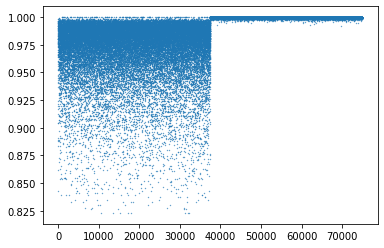

In [34]:
preds = model.predict(x_train)
plt.scatter(np.arange(len(preds)), preds, s=0.1)

In [35]:
print(lookup_model(model,x_train[-1],bf))

True


In [77]:
def calculate_fpr(model,bf,x_train,y_train):
    np1=0
    sumn=0
    y_pred = model.predict(x_train)
    for i in range(len(x_train)):
        sumn+=y_train[i]
        if((y_pred[i]>0.99 or bf.lookup(x_train[i])) and y_train[i]==0):
            np1+=1
            continue
        if((y_pred[i]<=0.99 and bf.lookup(x_train[i])==False) and y_train[i]==1):
            print(i)
            return -1
    neg1=len(y_train)-K.sum(y_train) #counting no of zeros
    neg1=np.array(neg1)
    #neg1=tf.cast(neg1,tf.int32)
    #print(len(y_train))
    print(neg1)
    #print(y_train.dtype)
    #neg=len(y_train)-sumn
    return float(np1/neg1)

In [78]:
print(calculate_fpr(model,bf,x_train,y_train))

Tensor("sub_7:0", shape=(), dtype=int64)


TypeError: float() argument must be a string or a number, not 'Tensor'

In [42]:
model.predict(x_train[5])

array([[0.95187294]], dtype=float32)

In [43]:
bf.lookup(x_train[5])

True

In [ ]:
y_t[5]